In [242]:
import config

In [243]:
import pandas as pd
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [244]:
from IPython.display import IFrame

In [245]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [246]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",)

In [247]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [248]:
results = sp.user_playlist_tracks('spotify','5fo41o54DPTvdPO2uMTDH1',market="GB")
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])
number_of_songs = len(tracks)
print(number_of_songs)

152


In [249]:
song_features = []

for index in range(0,number_of_songs):

    song = get_playlist_tracks('spotify','5fo41o54DPTvdPO2uMTDH1')[index]
    song_id = song["track"]["id"]
    features = sp.audio_features(song_id)[0]
    song_features.append(features)

song_features
    

[{'danceability': 0.731,
  'energy': 0.754,
  'key': 1,
  'loudness': -5.372,
  'mode': 1,
  'speechiness': 0.134,
  'acousticness': 0.0694,
  'instrumentalness': 0,
  'liveness': 0.329,
  'valence': 0.67,
  'tempo': 138.038,
  'type': 'audio_features',
  'id': '7A9VbC1Bs8Tz7gNrBwDOUX',
  'uri': 'spotify:track:7A9VbC1Bs8Tz7gNrBwDOUX',
  'track_href': 'https://api.spotify.com/v1/tracks/7A9VbC1Bs8Tz7gNrBwDOUX',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7A9VbC1Bs8Tz7gNrBwDOUX',
  'duration_ms': 144533,
  'time_signature': 4},
 {'danceability': 0.623,
  'energy': 0.692,
  'key': 2,
  'loudness': -5.122,
  'mode': 1,
  'speechiness': 0.0504,
  'acousticness': 0.328,
  'instrumentalness': 0,
  'liveness': 0.153,
  'valence': 0.566,
  'tempo': 79.899,
  'type': 'audio_features',
  'id': '6iaSML1PIYq936g62BDtBq',
  'uri': 'spotify:track:6iaSML1PIYq936g62BDtBq',
  'track_href': 'https://api.spotify.com/v1/tracks/6iaSML1PIYq936g62BDtBq',
  'analysis_url': 'https://api.spotify.

In [250]:
df=pd.DataFrame(song_features)    
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.731,0.754,-5.372,0.1340,0.0694,0.000000,0.3290,0.670,138.038,7A9VbC1Bs8Tz7gNrBwDOUX,144533
1,0.623,0.692,-5.122,0.0504,0.3280,0.000000,0.1530,0.566,79.899,6iaSML1PIYq936g62BDtBq,240051
2,0.702,0.792,-6.154,0.3620,0.0662,0.000647,0.1050,0.352,132.048,7gpSIL1cTo9hRaJWzJ366l,167230
3,0.719,0.426,-8.064,0.0792,0.3910,0.000110,0.1150,0.318,99.059,2sFsvaMRe8PKo5AFdBE9qC,165477
4,0.761,0.525,-6.900,0.0944,0.4400,0.000007,0.0921,0.531,80.870,6CDzDgIUqeDY5g8ujExx2f,238805
...,...,...,...,...,...,...,...,...,...,...,...
147,0.700,0.854,-5.436,0.0879,0.0877,0.034400,0.4530,0.172,137.943,4MUMWxe9088SuTFKpprQ57,160000
148,0.629,0.736,-6.790,0.0488,0.3000,0.000007,0.1580,0.311,125.261,6J07Aeq7fOW5Xx9mFtwyoH,178721
149,0.545,0.423,-10.914,0.0306,0.1310,0.010200,0.1060,0.375,144.840,749AelQ3MztBd0mbl9kvDl,303120
150,0.775,0.713,-5.422,0.3000,0.1050,0.325000,0.0918,0.299,125.934,2v0d2zo4bgHkge4B1O6e3c,158571


In [251]:
## 2nd play list

In [252]:
results = sp.user_playlist_tracks('spotify','5qrYbPaRq88Ngf81ZsuORt',market="GB")
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])
number_of_songs = len(tracks)

In [253]:
song_features = []

for index in range(0,number_of_songs):

    song = get_playlist_tracks('spotify','5qrYbPaRq88Ngf81ZsuORt')[index]
    song_id = song["track"]["id"]
    features = sp.audio_features(song_id)[0]
    song_features.append(features)

song_features

ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

In [271]:
df2=pd.DataFrame(song_features)    
df2=df2[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.279,0.473,-8.375,0.0309,0.242000,0.001640,0.1580,0.246,167.792,6yLIqXX9edg1x0HZS7cZEv,257107
1,0.228,0.224,-12.749,0.0311,0.946000,0.000222,0.2730,0.180,60.300,2TjnCxxQRYn56Ye8gkUKiW,213713
2,0.467,0.367,-8.164,0.0298,0.771000,0.000023,0.0847,0.205,70.856,3SPcBPzvbmWLl8NU5efx4W,280360
3,0.404,0.523,-15.700,0.0575,0.685000,0.000498,0.2820,0.164,133.738,5HQEmiV2lKnSO6qa2fsR7x,366640
4,0.441,0.547,-12.222,0.0337,0.130000,0.000143,0.1090,0.716,134.753,5VSAonaAPhhGn0G7hMYwWK,199573
...,...,...,...,...,...,...,...,...,...,...,...
56,0.519,0.882,-6.602,0.0714,0.010600,0.000008,0.0776,0.362,128.019,3zEIr9um4gCoz8iyefYFeW,271027
57,0.425,0.554,-4.145,0.0298,0.134000,0.000086,0.0963,0.288,83.917,6LCEyZZHFF4ebF1Mike1s5,237297
58,0.301,0.304,-9.144,0.0324,0.514000,0.000000,0.0646,0.179,90.212,5daJfP9ZOzCkZxGSqmWtdx,241533
59,0.408,0.253,-9.780,0.0271,0.619000,0.000000,0.1670,0.139,101.572,7xSodlywi4UVAR2HwjA4yX,198720


In [272]:
## 3rd play list

In [276]:
results = sp.user_playlist_tracks('spotify','6QJNH1flgrUZywrBOgZBfh',market="GB")
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])
number_of_songs = len(tracks)
print(number_of_songs)

131


In [274]:
song_features = []

for index in range(0,number_of_songs):

    song = get_playlist_tracks('spotify','6QJNH1flgrUZywrBOgZBfh')[index]
    song_id = song["track"]["id"]
    features = sp.audio_features(song_id)[0]
    song_features.append(features)

song_features

[{'danceability': 0.6,
  'energy': 0.713,
  'key': 6,
  'loudness': -5.079,
  'mode': 0,
  'speechiness': 0.0592,
  'acousticness': 0.0642,
  'instrumentalness': 0,
  'liveness': 0.142,
  'valence': 0.471,
  'tempo': 72.999,
  'type': 'audio_features',
  'id': '0UzymivvUH5s8z4PeWZJaK',
  'uri': 'spotify:track:0UzymivvUH5s8z4PeWZJaK',
  'track_href': 'https://api.spotify.com/v1/tracks/0UzymivvUH5s8z4PeWZJaK',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0UzymivvUH5s8z4PeWZJaK',
  'duration_ms': 172107,
  'time_signature': 4},
 {'danceability': 0.689,
  'energy': 0.678,
  'key': 5,
  'loudness': -4.287,
  'mode': 0,
  'speechiness': 0.119,
  'acousticness': 0.0702,
  'instrumentalness': 0,
  'liveness': 0.0889,
  'valence': 0.335,
  'tempo': 145.883,
  'type': 'audio_features',
  'id': '0yB4jrSwN0bFtFRDR5vyMj',
  'uri': 'spotify:track:0yB4jrSwN0bFtFRDR5vyMj',
  'track_href': 'https://api.spotify.com/v1/tracks/0yB4jrSwN0bFtFRDR5vyMj',
  'analysis_url': 'https://api.spotify

In [275]:
df3=pd.DataFrame(song_features)    
df3=df3[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.600,0.713,-5.079,0.0592,0.064200,0.000000,0.1420,0.471,72.999,0UzymivvUH5s8z4PeWZJaK,172107
1,0.689,0.678,-4.287,0.1190,0.070200,0.000000,0.0889,0.335,145.883,0yB4jrSwN0bFtFRDR5vyMj,200306
2,0.828,0.731,-3.033,0.1110,0.061700,0.000000,0.0480,0.587,119.978,7n2FZQsaLb7ZRfRPfEeIvr,178453
3,0.599,0.869,-5.174,0.0618,0.000707,0.000000,0.0911,0.453,132.889,1wcr8DjnN59Awev8nnKpQ4,193260
4,0.664,0.666,-2.203,0.0446,0.193000,0.000000,0.0854,0.405,139.987,3CYH422oy1cZNoo0GTG1TK,210560
...,...,...,...,...,...,...,...,...,...,...,...
126,0.615,0.871,-1.248,0.0516,0.042700,0.000000,0.2540,0.297,123.915,1oen3GpTcA486fTHaT7neg,202533
127,0.852,0.749,-6.218,0.0488,0.017700,0.000133,0.0695,0.386,103.060,5VXSt0cvi5wtJTox0wKI4x,147241
128,0.654,0.707,-5.661,0.0664,0.005590,0.000000,0.0873,0.448,127.970,4Ws314Ylb27BVsvlZOy30C,194765
129,0.367,0.668,-4.484,0.0520,0.336000,0.000000,0.1470,0.384,104.961,6S2gYweMmT6xygVh5q3QLa,226212


In [277]:
df_final = pd.concat([df, df2,df3], axis=0)

In [278]:
df_final

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.731,0.754,-5.372,0.1340,0.06940,0.000000,0.3290,0.670,138.038,7A9VbC1Bs8Tz7gNrBwDOUX,144533
1,0.623,0.692,-5.122,0.0504,0.32800,0.000000,0.1530,0.566,79.899,6iaSML1PIYq936g62BDtBq,240051
2,0.702,0.792,-6.154,0.3620,0.06620,0.000647,0.1050,0.352,132.048,7gpSIL1cTo9hRaJWzJ366l,167230
3,0.719,0.426,-8.064,0.0792,0.39100,0.000110,0.1150,0.318,99.059,2sFsvaMRe8PKo5AFdBE9qC,165477
4,0.761,0.525,-6.900,0.0944,0.44000,0.000007,0.0921,0.531,80.870,6CDzDgIUqeDY5g8ujExx2f,238805
...,...,...,...,...,...,...,...,...,...,...,...
126,0.615,0.871,-1.248,0.0516,0.04270,0.000000,0.2540,0.297,123.915,1oen3GpTcA486fTHaT7neg,202533
127,0.852,0.749,-6.218,0.0488,0.01770,0.000133,0.0695,0.386,103.060,5VXSt0cvi5wtJTox0wKI4x,147241
128,0.654,0.707,-5.661,0.0664,0.00559,0.000000,0.0873,0.448,127.970,4Ws314Ylb27BVsvlZOy30C,194765
129,0.367,0.668,-4.484,0.0520,0.33600,0.000000,0.1470,0.384,104.961,6S2gYweMmT6xygVh5q3QLa,226212


In [279]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.731,0.754,-5.372,0.1340,0.0694,0.000000,0.3290,0.670,138.038,7A9VbC1Bs8Tz7gNrBwDOUX,144533
1,0.623,0.692,-5.122,0.0504,0.3280,0.000000,0.1530,0.566,79.899,6iaSML1PIYq936g62BDtBq,240051
2,0.702,0.792,-6.154,0.3620,0.0662,0.000647,0.1050,0.352,132.048,7gpSIL1cTo9hRaJWzJ366l,167230
3,0.719,0.426,-8.064,0.0792,0.3910,0.000110,0.1150,0.318,99.059,2sFsvaMRe8PKo5AFdBE9qC,165477
4,0.761,0.525,-6.900,0.0944,0.4400,0.000007,0.0921,0.531,80.870,6CDzDgIUqeDY5g8ujExx2f,238805
...,...,...,...,...,...,...,...,...,...,...,...
147,0.700,0.854,-5.436,0.0879,0.0877,0.034400,0.4530,0.172,137.943,4MUMWxe9088SuTFKpprQ57,160000
148,0.629,0.736,-6.790,0.0488,0.3000,0.000007,0.1580,0.311,125.261,6J07Aeq7fOW5Xx9mFtwyoH,178721
149,0.545,0.423,-10.914,0.0306,0.1310,0.010200,0.1060,0.375,144.840,749AelQ3MztBd0mbl9kvDl,303120
150,0.775,0.713,-5.422,0.3000,0.1050,0.325000,0.0918,0.299,125.934,2v0d2zo4bgHkge4B1O6e3c,158571


In [280]:
audio_features=audio_features[['energy','instrumentalness','liveness']]
audio_features

NameError: name 'audio_features' is not defined

In [281]:
df_final_noid = df_final.drop(columns="id")

In [282]:
df_final_noid

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.731,0.754,-5.372,0.1340,0.06940,0.000000,0.3290,0.670,138.038,144533
1,0.623,0.692,-5.122,0.0504,0.32800,0.000000,0.1530,0.566,79.899,240051
2,0.702,0.792,-6.154,0.3620,0.06620,0.000647,0.1050,0.352,132.048,167230
3,0.719,0.426,-8.064,0.0792,0.39100,0.000110,0.1150,0.318,99.059,165477
4,0.761,0.525,-6.900,0.0944,0.44000,0.000007,0.0921,0.531,80.870,238805
...,...,...,...,...,...,...,...,...,...,...
126,0.615,0.871,-1.248,0.0516,0.04270,0.000000,0.2540,0.297,123.915,202533
127,0.852,0.749,-6.218,0.0488,0.01770,0.000133,0.0695,0.386,103.060,147241
128,0.654,0.707,-5.661,0.0664,0.00559,0.000000,0.0873,0.448,127.970,194765
129,0.367,0.668,-4.484,0.0520,0.33600,0.000000,0.1470,0.384,104.961,226212


In [283]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import numpy as np

In [284]:
scaler = StandardScaler()
scaler.fit(df_final_noid)
df_final_scaled = scaler.transform(df_final_noid)
df_final_scaled

array([[ 0.5692738 ,  0.21150059,  0.08137395, ...,  0.7905701 ,
         0.47658651, -1.22950539],
       [-0.16859942, -0.13376421,  0.14271021, ...,  0.28962455,
        -1.61461601,  0.92657527],
       [ 0.37114117,  0.4231145 , -0.11048585, ..., -0.74116725,
         0.26113212, -0.71717722],
       ...,
       [ 0.04319752, -0.0502324 ,  0.01046924, ..., -0.27875598,
         0.11445048, -0.09564325],
       [-1.91763225, -0.2674151 ,  0.29924033, ..., -0.58703016,
        -0.71316057,  0.61419435],
       [-1.94496088, -0.13933299, -0.20739713, ..., -1.37698276,
        -1.23366818, -1.16284878]])

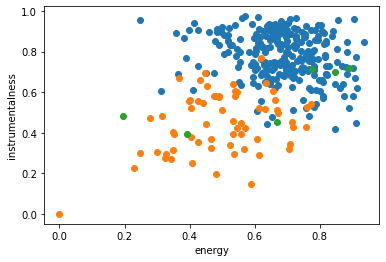

In [285]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(df_final_scaled)
# assign a cluster to each example
labels = kmeans.predict(df_final_scaled)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_final.to_numpy()[row_ix, 0], df_final.to_numpy()[row_ix,1])
    pyplot.xlabel("energy")
    pyplot.ylabel("instrumentalness")
    # show the plot
pyplot.show()

In [286]:
clusters = kmeans.predict(df_final_scaled)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    275
1     63
2      6
dtype: int64

In [287]:
df_final["cluster"] = clusters
df_final

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.731,0.754,-5.372,0.1340,0.06940,0.000000,0.3290,0.670,138.038,7A9VbC1Bs8Tz7gNrBwDOUX,144533,0
1,0.623,0.692,-5.122,0.0504,0.32800,0.000000,0.1530,0.566,79.899,6iaSML1PIYq936g62BDtBq,240051,0
2,0.702,0.792,-6.154,0.3620,0.06620,0.000647,0.1050,0.352,132.048,7gpSIL1cTo9hRaJWzJ366l,167230,0
3,0.719,0.426,-8.064,0.0792,0.39100,0.000110,0.1150,0.318,99.059,2sFsvaMRe8PKo5AFdBE9qC,165477,1
4,0.761,0.525,-6.900,0.0944,0.44000,0.000007,0.0921,0.531,80.870,6CDzDgIUqeDY5g8ujExx2f,238805,1
...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.615,0.871,-1.248,0.0516,0.04270,0.000000,0.2540,0.297,123.915,1oen3GpTcA486fTHaT7neg,202533,0
127,0.852,0.749,-6.218,0.0488,0.01770,0.000133,0.0695,0.386,103.060,5VXSt0cvi5wtJTox0wKI4x,147241,0
128,0.654,0.707,-5.661,0.0664,0.00559,0.000000,0.0873,0.448,127.970,4Ws314Ylb27BVsvlZOy30C,194765,0
129,0.367,0.668,-4.484,0.0520,0.33600,0.000000,0.1470,0.384,104.961,6S2gYweMmT6xygVh5q3QLa,226212,1


In [288]:
df_final[df_final['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
100,0.669,0.452,-12.112,0.231,0.42,0.291,0.0999,0.106,165.035,0fmbjLzenF8z20WN0QPSXl,208000,2


In [289]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=25,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df_final_scaled)
print(kmeans2.inertia_)

2515.0624708661617


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

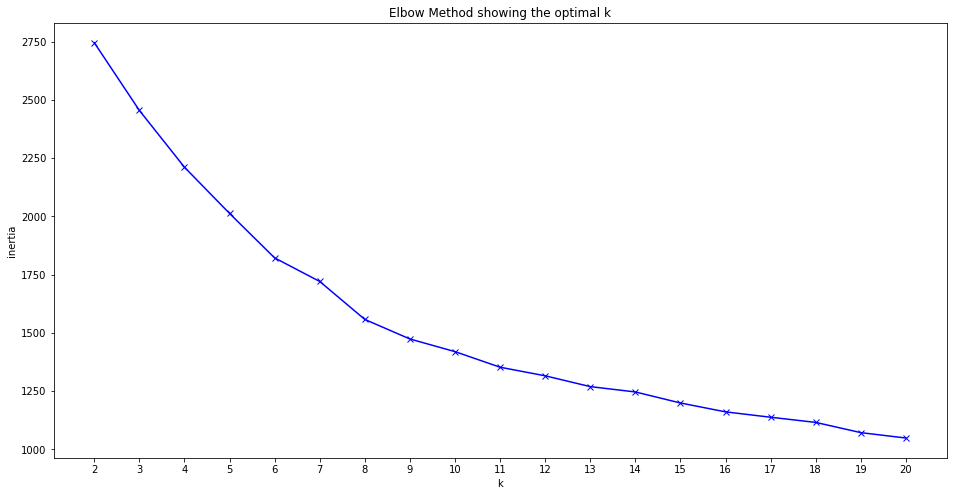

In [290]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_final_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [291]:
cluster = kmeans2.labels_

In [292]:
df_final["cluster"] = cluster

In [293]:
df_final.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.731,0.754,-5.372,0.1340,0.06940,0.000000,0.3290,0.670,138.038,7A9VbC1Bs8Tz7gNrBwDOUX,144533,0
1,0.623,0.692,-5.122,0.0504,0.32800,0.000000,0.1530,0.566,79.899,6iaSML1PIYq936g62BDtBq,240051,0
2,0.702,0.792,-6.154,0.3620,0.06620,0.000647,0.1050,0.352,132.048,7gpSIL1cTo9hRaJWzJ366l,167230,2
3,0.719,0.426,-8.064,0.0792,0.39100,0.000110,0.1150,0.318,99.059,2sFsvaMRe8PKo5AFdBE9qC,165477,1
4,0.761,0.525,-6.900,0.0944,0.44000,0.000007,0.0921,0.531,80.870,6CDzDgIUqeDY5g8ujExx2f,238805,0
5,0.774,0.792,-4.021,0.0523,0.05100,0.000000,0.1550,0.507,122.062,3eJH2nAjvNXdmPfBkALiPZ,139672,0
6,0.762,0.766,-3.955,0.0343,0.00776,0.000070,0.1280,0.442,130.001,5fwSHlTEWpluwOM0Sxnh5k,287120,0
7,0.767,0.481,-8.520,0.0803,0.23400,0.000000,0.2690,0.761,150.076,1xQ6trAsedVPCdbtDAmk0c,171375,0
8,0.637,0.819,-4.609,0.1010,0.04860,0.002550,0.1130,0.286,125.007,7xvBUedE9qpLNtIv3VmHXh,198479,0
9,0.810,0.571,-7.189,0.0850,0.06240,0.000002,0.0940,0.771,125.994,6eCmK3GQyFuTNWCJHsaF9d,179375,0


In [ ]:
#################

In [428]:
user_input = input("Choose your song")

Choose your songscary


In [429]:
user_input
song = sp.search(q=user_input,limit=1,market="GB")
song_id = song["tracks"]["items"][0]["id"]
song_id

'658QJ4p8WcbT3O7iWLpO1D'

In [430]:
features = sp.audio_features(song_id)[0]

In [431]:
song_features=pd.DataFrame([features])
song_features=song_features[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms"]]

In [432]:
scale_input_features = scaler.transform(song_features)

In [433]:
song_cluster = kmeans2.predict(scale_input_features)
song_cluster

array([2])

In [434]:
recommended_song = list(df_final.loc[df_final["cluster"]==int(song_cluster)].sample(1)["id"])
recommended_song

['6I3mqTwhRpn34SLVafSH7G']

In [435]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [436]:
play_song(recommended_song[0])

In [422]:
recommended_song

['6LCEyZZHFF4ebF1Mike1s5']